<a href="https://colab.research.google.com/github/cristobalperezp/Data-Science-training/blob/main/Copia_de_Auxiliar_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxiliar 3: Renta Variable:

Primero se importan las librerias correspondientes

In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data
import yfinance as yf

Luego, se importan las bases de datos a trabajar. Vamos a seleccionar 7 acciones de las empresas del S&P 500. En este caso usaremos Apple, Microsoft, Amazon, Google, Facebook, Tesla, Visa y tendremos de Benchmark el S&P500 y Nasdaq.

Nasdaq: https://es.wikipedia.org/wiki/NASDAQ

S&P 500: https://es.wikipedia.org/wiki/S%26P_500

Se define la fecha desde que queremos los datos, para este caso vamos a requerir los datos hasta 5 años hacía atrás (arbitrariamente).

In [ ]:
fechaInicio = "2016-11-15"
hoy = datetime.today().strftime('%Y-%m-%d')

Ahora utilizamos la libreria yfinance para extraer la información.

In [ ]:
data = yf.download("AAPL MSFT AMZN GOOGL FB TSLA V ^GSPC ^IXIC", start= fechaInicio, end=hoy)
df = data["Adj Close"]
df

[*********************100%***********************]  9 of 9 completed


,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V,^GSPC,^IXIC
Date,,,,,,,,,
2016-11-15,25.173105,743.239990,117.199997,775.159973,54.623093,36.754002,75.785797,2180.389893,5275.620117
2016-11-16,25.849960,746.489990,116.339996,779.979980,55.346828,36.785999,77.404816,2176.939941,5294.580078
2016-11-17,25.840565,756.400024,117.790001,786.159973,56.265404,37.731998,78.361771,2187.120117,5333.970215
2016-11-18,25.866417,760.159973,117.019997,775.969971,55.996319,37.004002,78.120117,2181.899902,5321.509766
2016-11-21,26.258902,780.000000,121.769997,784.799988,56.469532,36.903999,78.961075,2198.179932,5368.859863
...,...,...,...,...,...,...,...,...,...
2022-04-11,165.750000,3022.439941,216.460007,2576.469971,285.260010,975.929993,214.750000,4412.529785,13411.959961
2022-04-12,167.660004,3015.750000,214.139999,2554.290039,282.059998,986.950012,211.399994,4397.450195,13371.570312
2022-04-13,170.399994,3110.820068,214.990005,2597.879883,287.619995,1022.369995,213.270004,4446.589844,13643.589844


## EDA

Realizaremos gráficos para inspeccionar los datos

### Gráfico precio de las acciones en el tiempo.

In [ ]:
df_2 = df/df.iloc[0]
df_2

,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V,^GSPC,^IXIC
Date,,,,,,,,,
2016-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-11-16,1.026888,1.004373,0.992662,1.006218,1.013250,1.000871,1.021363,0.998418,1.003594
2016-11-17,1.026515,1.017706,1.005034,1.014191,1.030066,1.026609,1.033990,1.003087,1.011060
2016-11-18,1.027542,1.022765,0.998464,1.001045,1.025140,1.006802,1.030802,1.000693,1.008698
2016-11-21,1.043133,1.049459,1.038993,1.012436,1.033803,1.004081,1.041898,1.008159,1.017674
...,...,...,...,...,...,...,...,...,...
2022-04-11,6.584408,4.066573,1.846928,3.323791,5.222334,26.553027,2.833644,2.023734,2.542253
2022-04-12,6.660283,4.057572,1.827133,3.295178,5.163750,26.852859,2.789441,2.016818,2.534597
2022-04-13,6.769129,4.185485,1.834386,3.351411,5.265538,27.816563,2.814116,2.039355,2.586159


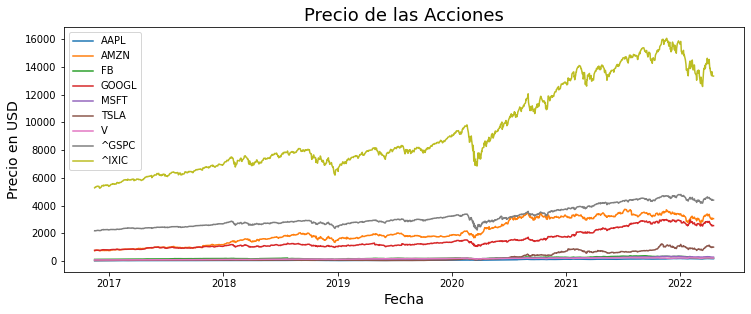

In [ ]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Precio de las Acciones',fontsize=18)
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Precio en USD',fontsize=14)
plt.legend(df.columns.values, loc='upper left')
plt.show()

### Evolución del precio en el tiempo

Se realiza un gráfico diferente para ver las acciones que tienen un menor precio.

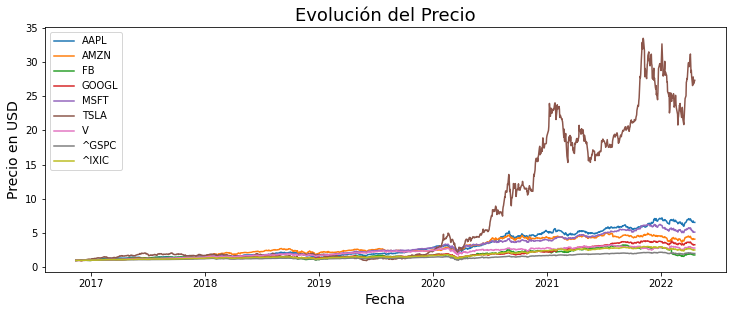

In [ ]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df_2[i],  label=i)
plt.title('Evolución del Precio',fontsize=18)
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Precio en USD',fontsize=14)
plt.legend(df.columns.values, loc='upper left')
plt.show()

# Enunciado

## 1.

Estimen el  vector  de  retornos  esperados  en  un  año  más  para  los  7  activos.  Discutan claramente cómo lo obtuvieron, y los supuestos involucrados.

Pasamos nuestra base de datos a los retornos logaritmicos de las acciones. 

In [ ]:
df = np.log(df).diff().dropna()
df.head()

,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V,^GSPC,^IXIC
Date,,,,,,,,,
2016-11-16,0.026533,0.004363,-0.007365,0.006199,0.013163,0.000870,0.021138,-0.001584,0.003587
2016-11-17,-0.000364,0.013188,0.012386,0.007892,0.016460,0.025391,0.012287,0.004665,0.007412
2016-11-18,0.001000,0.004959,-0.006559,-0.013046,-0.004794,-0.019482,-0.003089,-0.002390,-0.002339
2016-11-21,0.015060,0.025765,0.039789,0.011315,0.008415,-0.002706,0.010707,0.007434,0.008859
2016-11-22,0.000626,0.006810,-0.002467,0.000255,0.004263,0.035405,-0.021781,0.002163,0.003252


Al hacer la transformación logaritmica perdemos datos de la primera columna. Se procede a eliminarla.

In [ ]:
df = df.dropna()
df.head()

,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V,^GSPC,^IXIC
Date,,,,,,,,,
2016-11-16,0.026533,0.004363,-0.007365,0.006199,0.013163,0.000870,0.021138,-0.001584,0.003587
2016-11-17,-0.000364,0.013188,0.012386,0.007892,0.016460,0.025391,0.012287,0.004665,0.007412
2016-11-18,0.001000,0.004959,-0.006559,-0.013046,-0.004794,-0.019482,-0.003089,-0.002390,-0.002339
2016-11-21,0.015060,0.025765,0.039789,0.011315,0.008415,-0.002706,0.010707,0.007434,0.008859
2016-11-22,0.000626,0.006810,-0.002467,0.000255,0.004263,0.035405,-0.021781,0.002163,0.003252


### Estimación Retorno Esperado: CAPM

Ya que ya se calcló el retorno promedio anual para cada una de las acciones, calculmenos CAPM. Gracias a Python hay una función que calcula directamente CAPM. Para eso debemos instalar la libreria Pypfopt.

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 6.4 MB/s 
     |████████████████████████████████| 2.8 MB 47.2 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

Primero voy a separar el Benchmark del resto de los activos. Ya que en la formula los piden separados.

In [ ]:
df1 =  df.loc[:, df.columns != '^GSPC']
df1

,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V,^IXIC
Date,,,,,,,,
2016-11-16,0.026533,0.004363,-0.007365,0.006199,0.013163,0.000870,0.021138,0.003587
2016-11-17,-0.000364,0.013188,0.012386,0.007892,0.016460,0.025391,0.012287,0.007412
2016-11-18,0.001000,0.004959,-0.006559,-0.013046,-0.004794,-0.019482,-0.003089,-0.002339
2016-11-21,0.015060,0.025765,0.039789,0.011315,0.008415,-0.002706,0.010707,0.008859
2016-11-22,0.000626,0.006810,-0.002467,0.000255,0.004263,0.035405,-0.021781,0.003252
...,...,...,...,...,...,...,...,...
2022-04-11,-0.025847,-0.021851,-0.026757,-0.034065,-0.040230,-0.049535,-0.010331,-0.022052
2022-04-12,0.011458,-0.002216,-0.010776,-0.008646,-0.011281,0.011229,-0.015723,-0.003016
2022-04-13,0.016210,0.031038,0.003962,0.016921,0.019520,0.035259,0.008807,0.020139


In [ ]:
df_activos =  df1.loc[:, df1.columns != '^IXIC']
df_activos

,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V
Date,,,,,,,
2016-11-16,0.026533,0.004363,-0.007365,0.006199,0.013163,0.000870,0.021138
2016-11-17,-0.000364,0.013188,0.012386,0.007892,0.016460,0.025391,0.012287
2016-11-18,0.001000,0.004959,-0.006559,-0.013046,-0.004794,-0.019482,-0.003089
2016-11-21,0.015060,0.025765,0.039789,0.011315,0.008415,-0.002706,0.010707
2016-11-22,0.000626,0.006810,-0.002467,0.000255,0.004263,0.035405,-0.021781
...,...,...,...,...,...,...,...
2022-04-11,-0.025847,-0.021851,-0.026757,-0.034065,-0.040230,-0.049535,-0.010331
2022-04-12,0.011458,-0.002216,-0.010776,-0.008646,-0.011281,0.011229,-0.015723
2022-04-13,0.016210,0.031038,0.003962,0.016921,0.019520,0.035259,0.008807


In [ ]:
df_benchmark =  df.loc[:, df.columns == '^GSPC']
df_benchmark.head()

,^GSPC
Date,
2016-11-16,-0.001584
2016-11-17,0.004665
2016-11-18,-0.002390
2016-11-21,0.007434
2016-11-22,0.002163


In [ ]:
df_benchmark1 =  df.loc[:, df.columns == '^IXIC']
df_benchmark1.head()

,^IXIC
Date,
2016-11-16,0.003587
2016-11-17,0.007412
2016-11-18,-0.002339
2016-11-21,0.008859
2016-11-22,0.003252


Ya estamos listos para utilizar la función de la libreria. ¿Pero que le debo entregar a la función?

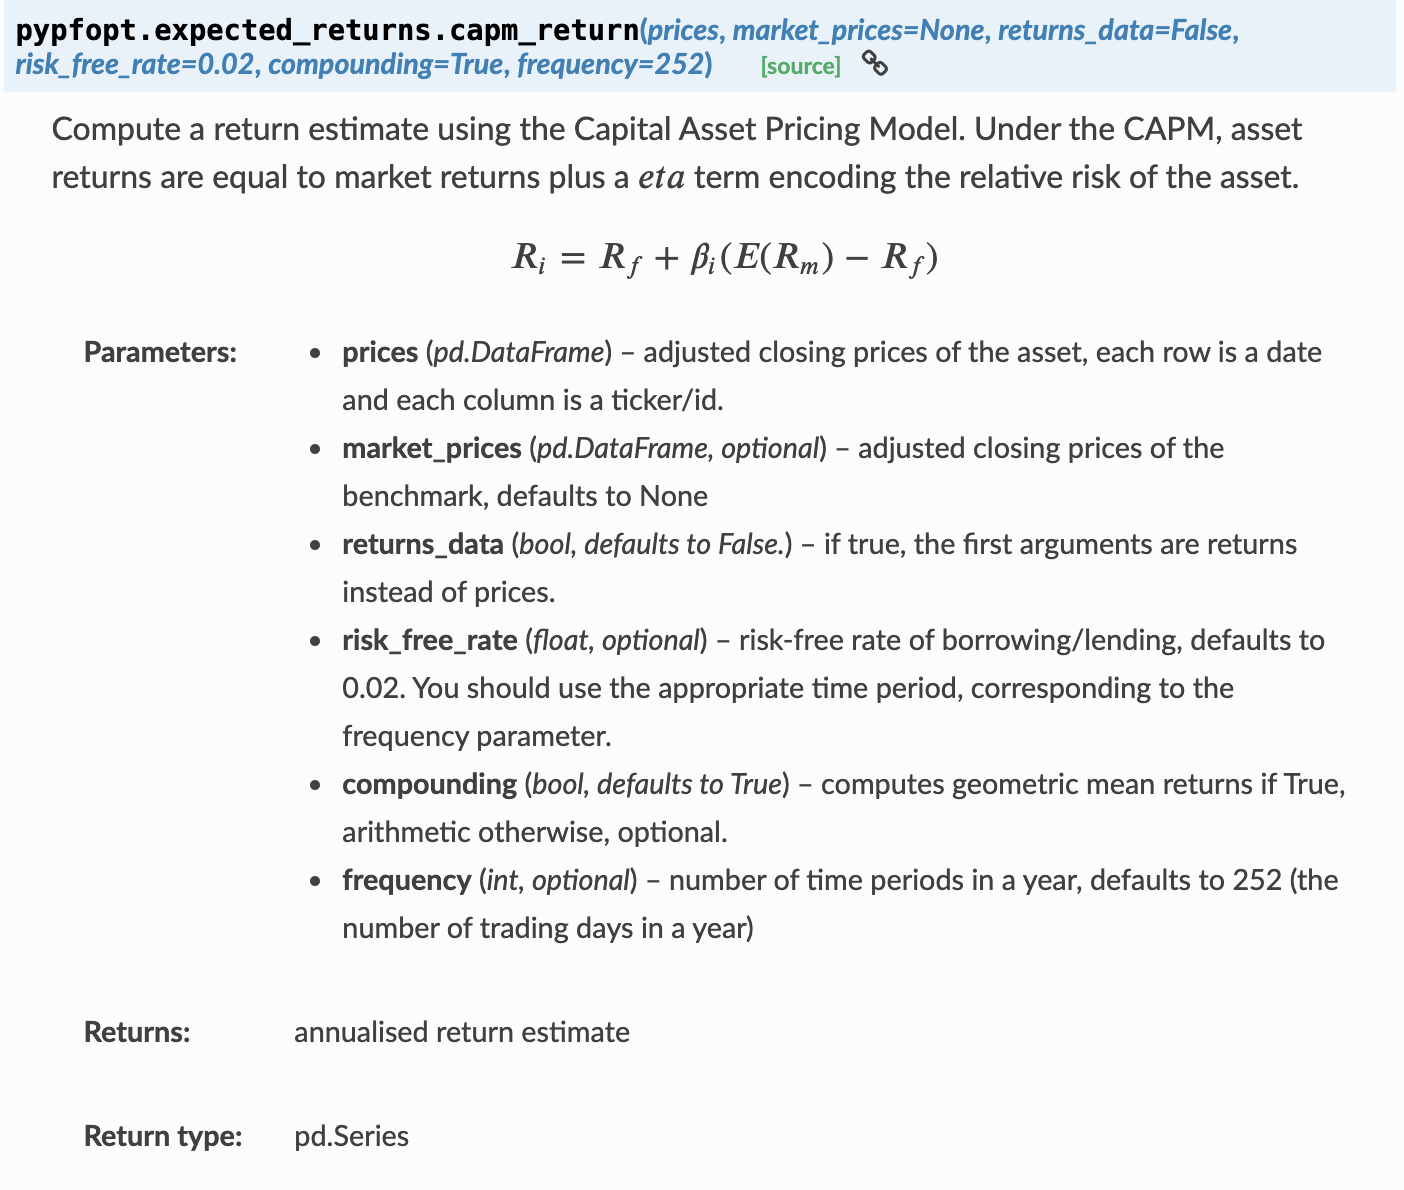

Por las dudas:

Compounding: https://www.investopedia.com/terms/g/geometricmean.asp

Tasa Libre de Riesgo: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield

Se calcular los retornos esperados siguiendo el modelo CAPM con el S%P500 como Benchmark

In [ ]:
retornos = expected_returns.capm_return(df_activos, market_prices = df_benchmark, returns_data= True, risk_free_rate=0.08/100, frequency=252)
retornos

AAPL     0.141023
AMZN     0.113865
FB       0.137243
GOOGL    0.129094
MSFT     0.140752
TSLA     0.163821
V        0.131866
Name: mkt, dtype: float64

Ahora calculamos los retornos con otro Benchmark. En este caso el Nasdaq.

In [ ]:
retornos1 = expected_returns.capm_return(df_activos, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.08/100, frequency=252)
Rretornos1

AAPL     0.177638
AMZN     0.161409
FB       0.181457
GOOGL    0.160572
MSFT     0.174666
TSLA     0.230568
V        0.143403
Name: mkt, dtype: float64

### Opción 2: EWMA

In [ ]:
retornos2 = expected_returns.ema_historical_return(df_activos, returns_data= True)
retornos2

AAPL     0.323460
AMZN     0.033047
FB      -0.217584
GOOGL    0.171127
MSFT     0.148166
TSLA     0.895527
V        0.035321
Name: 2022-04-18 00:00:00, dtype: float64

### Opción 3: Promedio historico

In [ ]:
retornos3 = expected_returns.mean_historical_return(df_activos, returns_data= True)
retornos3

AAPL     0.352451
AMZN     0.240570
FB       0.040750
GOOGL    0.200750
MSFT     0.302203
TSLA     0.536808
V        0.167762
dtype: float64

## 2

A partir de las estimaciones de volatilidades/correlaciones diarias y mensuales, estimen las  volatilidades  y  correlaciones  anuales.  Discutan y  justifiquen el método  seguido  para dicha estimación

### Volatilidad Diaria:

La volatilidad ($\sigma_{i}$) es la desviación estándar de los datos.

In [ ]:
volatilidad_Apple = np.sqrt(statistics.variance(df["AAPL"]))
print(str(round(volatilidad_Apple,4)*100) + "%")

1.8599999999999999%


In [ ]:
volatilidad_MSFT = np.sqrt(statistics.variance(df["MSFT"]))
print(str(round(volatilidad_MSFT,2)*100) + "%")

2.0%


### Volatilidad Mensual: 

En el caso de la volatilidad mensual debemos multiplicar la volatilidad diaria por raíz de 21 días.

In [ ]:
volatilidad_Apple_mensual = volatilidad_Apple*np.sqrt(21)
print(str(round(volatilidad_Apple_mensual,4)*100) + "%")

8.5%


### Volatilidad Anual:

En el caso de la volatilidad anual debemos multiplicar la volatilidad diaria por raiz de 252 días.

In [ ]:
volatilidad_Apple_anual = volatilidad_Apple*np.sqrt(252)
print(str(round(volatilidad_Apple_anual,2)*100) + "%")

28.999999999999996%


### Coeficiente de correlación:

El coeficiente de correlación se define de la siguiente forma:
    
$\rho_{A,B} = \frac{COV(R_{A},R_{B})}{\sigma_{A}\cdot\sigma_b}$

In [ ]:
df_cov = df_activos.cov()*252
df_cov

,AAPL,AMZN,FB,GOOGL,MSFT,TSLA,V
AAPL,0.086726,0.053585,0.058441,0.051572,0.057586,0.072366,0.046510
AMZN,0.053585,0.087300,0.062595,0.051388,0.055204,0.066175,0.037775
FB,0.058441,0.062595,0.123075,0.061418,0.058173,0.066805,0.047966
GOOGL,0.051572,0.051388,0.061418,0.070729,0.056032,0.058224,0.045817
MSFT,0.057586,0.055204,0.058173,0.056032,0.072739,0.068074,0.049300
TSLA,0.072366,0.066175,0.066805,0.058224,0.068074,0.340871,0.053203
V,0.046510,0.037775,0.047966,0.045817,0.049300,0.053203,0.068726


Por lo tanto, la el coeficiente de correlaión entre Apple y Microsoft está dado por:

In [ ]:
corr_coef_apple_msft = (df_cov["AAPL"]["MSFT"])/(volatilidad_Apple*volatilidad_MSFT)
corr_coef_apple_msft/252

0.7250335193444796

##Cartera de Minima Varianza:

Para realizar esto vamos a utilizar la misma libreria que se utilizó para CAPM. Pero primero debemos definir los pesos que tendrá nuestro portafolio de Minima Varianza. Se define inicialmente unos pesos arbitrarios iguales para todos.

In [ ]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal

pesos = pesosPortafolio(df_activos)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

Luego, se procede a calcular la varianza del portafolio que se define de la siguiente forma:

${\sigma_{portafolio}}^2 =  w^{T}\cdot\sum\cdot w $

In [ ]:
varianza_portafolio = np.dot(pesos.T, np.dot(df_cov, pesos))
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: 6.5%'

Ahora se calcula la volatilidad del portafolio que se define de la siguiente forma:

$\sigma_{portafolio} =  \sqrt{w^{T}\cdot\sum\cdot w}$

In [ ]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"

'La volatilidad del portafolio es: 25.6%'

In [ ]:
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'

'El retorno anual del portafolio es: 19.833%'

## 4

### Optimización para Mínima Varianza: Sin Venta Corta

In [ ]:
ef = EfficientFrontier(retornos1, df_cov,weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.10458), ('AMZN', 0.2138), ('FB', 0.0), ('GOOGL', 0.23409), ('MSFT', 0.03308), ('TSLA', 0.0), ('V', 0.41445)])
Expected annual return: 17.7%
Annual volatility: 23.2%
Sharpe Ratio: 0.68


(0.17691206498558926, 0.2319049121106466, 0.6766224292425651)

### Optimización para Mínima Varianza: Con Venta Corta

Ahora se procede a optimizar el portafolio para formar uno de minima varianza. ¿Qué es la venta corta?

https://www.youtube.com/watch?v=sLyb8AlXn_E

In [ ]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.11627), ('AMZN', 0.22693), ('FB', -0.03002), ('GOOGL', 0.24663), ('MSFT', 0.04293), ('TSLA', -0.02172), ('V', 0.41898)])
Expected annual return: 17.5%
Annual volatility: 23.2%
Sharpe Ratio: 0.67


(0.17489450173834842, 0.23150709121548954, 0.669070225560265)

# Links utiles:

https://randerson112358.medium.com/python-for-finance-portfolio-optimization-66882498847

https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html